In [39]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [32]:
# parameters
lr = 0.001
epochs = 500
batch_size = 100
disp_step = 100

In [3]:
# PARAMETERS 
hidd1 = 256
hidd2 = 256
num_in = 784
num_out = 10

# i/o
X = tf.placeholder(tf.float32, [None, num_in])
Y = tf.placeholder(tf.float32, [None, num_out])

# weights as dictionaries
weights = {
    'w1': tf.Variable(tf.random_normal([num_in, hidd1])),
    'w2': tf.Variable(tf.random_normal([hidd1, hidd2])),
    'wout': tf.Variable(tf.random_normal([hidd2, num_out])),
    'b1': tf.Variable(tf.random_normal([hidd1])),
    'b2': tf.Variable(tf.random_normal([hidd2])),
    'bout': tf.Variable(tf.random_normal([num_out]))
}

In [4]:
# MODEL
def nn(x, weights):
    lay1 = tf.add(tf.matmul(x, weights['w1']), weights['b1'])
    lay2 = tf.add(tf.matmul(lay1, weights['w2']), weights['b2'])
    lay_out = tf.add(tf.matmul(lay2, weights['wout']), weights['bout'])
    return lay_out

In [5]:
nn_out = nn(X, weights)

In [6]:
# COST
op_cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=nn_out, labels=Y))


In [33]:
# OPTIMISATION
op_optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(op_cost)


In [34]:
# ACCURACY EVALUATION
correct = tf.equal(tf.argmax(nn_out, 1), tf.argmax(Y,1))

accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [35]:
# INIT
init = tf.global_variables_initializer()

In [37]:
# Execute GRAPH
with tf.Session() as s:
    s.run(init)
    
    # TRAINING
    # Fit data using OPTIMISATION
    for e in range(epochs):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        s.run(op_optimizer, feed_dict={X: batch_xs, Y: batch_ys})
        if e % disp_step == 0 or e==1:
            loss, acc = s.run([op_cost, accuracy], feed_dict={X: batch_xs,
                                                              Y: batch_ys})
     
            print("Step " + str(e) + ", Minibatch Loss= " + \
              "{:.4f}".format(loss) + ", Training Accuracy= " + \
              "{:.3f}".format(acc))
        
        

    # TESTING
    print "Test Accuracy: ", \
    s.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
   
    # TEST PREDICTIONS
    test_pred = s.run(tf.argmax(nn_out, 1), feed_dict={X: mnist.test.images, Y: mnist.test.labels})
    

Step 0, Minibatch Loss= 3849.9556, Training Accuracy= 0.060
Step 1, Minibatch Loss= 3163.5049, Training Accuracy= 0.100
Step 100, Minibatch Loss= 260.9742, Training Accuracy= 0.720
Step 200, Minibatch Loss= 217.6221, Training Accuracy= 0.770
Step 300, Minibatch Loss= 262.6657, Training Accuracy= 0.770
Step 400, Minibatch Loss= 91.1447, Training Accuracy= 0.860
Test Accuracy:  0.8548


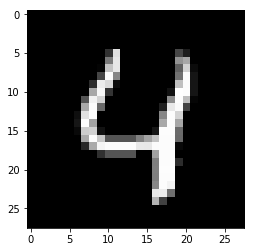

('Model prediction:', 6)


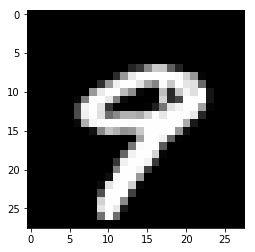

('Model prediction:', 9)


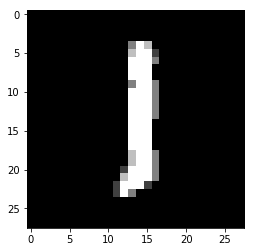

('Model prediction:', 1)


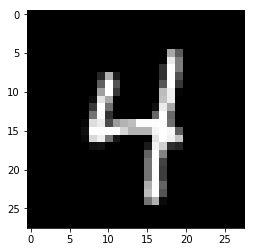

('Model prediction:', 4)


In [42]:
# Display
for ii in range(4):
    i = 4+5*ii
    plt.imshow(np.reshape(mnist.test.images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", test_pred[i])